In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
transcriptome = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv",
    index_col=0,
)
rows_to_drop_expression_data = [
    "A2450525897_n01_undetermined",
    "A2449446903_n01_undetermined",
    "B250508004_n01_undetermined",
    "B2449500127_n01_undetermined",
]
transcriptome = transcriptome.drop(index=rows_to_drop_expression_data)
transcriptome = transcriptome.sort_index()

metadata = pd.read_csv(
    "/Users/michael/Data/Luke_terrace_experiment/General_data/Plates_1_to_4_metadata_merged_luke.csv",
    index_col=0,
)
metadata = metadata.drop(
    columns=[
        "arb.sort",
        "sample-id",
        "Ambiguous Unstranded",
        "Ambiguous Forward",
        "Multimapping",
        "Unmapped Over Mapped",
    ]
)
metadata["Date and Time"] = metadata["date"] + " " + metadata["time"]
luke_time_data_format = "%-m/%-d/%y %-H:%-M"
metadata["Date and Time"] = pd.to_datetime(
    metadata["Date and Time"], format=luke_time_data_format
)

unusable_samples = [
    "A2450525897_n01_LICRNA01_A06",
    "A2450525897_n01_LICRNA01_A08",
    "A2450525897_n01_LICRNA01_C11",
    "A2450525897_n01_LICRNA01_D11",
    "A2450525897_n01_LICRNA01_D12",
    "A2449446903_n01_LICRNA02_F01",
    "B250508004_n01_LICRNA03_A08",
    "B2449500127_n01_LICRNA04_A04",
    "B2449500127_n01_LICRNA04_A06",
    "B2449500127_n01_LICRNA04_A07",
]
borderline_unusable = [
    "A2450525897_n01_LICRNA01_F03",
    "A2450525897_n01_LICRNA01_G07",
    "A2449446903_n01_LICRNA02_A04",
    "A2449446903_n01_LICRNA02_H10",
    "B250508004_n01_LICRNA03_H02",
    "B250508004_n01_LICRNA03_H10",
    "B2449500127_n01_LICRNA04_H02",
    "B2449500127_n01_LICRNA04_H11",
]

all_unsable = borderline_unusable + unusable_samples

trimmed_transcriptome = transcriptome.drop(index=all_unsable)
trimmed_metadata = metadata.drop(index=all_unsable)
trimmed_metadata = trimmed_metadata.sort_index()
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=0)
trimmed_transcriptome = trimmed_transcriptome.dropna(how="all", axis=1)

In [3]:
trimmed_transcriptome

AT1G01010  AT1G01020  AT1G03987  AT1G01030  \
A2449446903_n01_LICRNA02_A01   0.382839  11.929183        0.0   3.731527   
A2449446903_n01_LICRNA02_A02   0.000000   5.826682        0.0   1.501594   
A2449446903_n01_LICRNA02_A03   1.021565   7.683520        0.0   0.301733   
A2449446903_n01_LICRNA02_A05   0.732717   3.149144        0.0   1.947758   
A2449446903_n01_LICRNA02_A06   1.614233   1.238895        0.0   6.130092   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    2.166065   9.568129        0.0   2.452473   
B250508004_n01_LICRNA03_H08    0.074367   4.474710        0.0   1.383813   
B250508004_n01_LICRNA03_H09    2.232353   6.249002        0.0   1.873955   
B250508004_n01_LICRNA03_H11    0.678594   7.655887        0.0   0.901942   
B250508004_n01_LICRNA03_H12    0.000000   3.436049        0.0   2.004263   

                              AT1G01040  AT1G03993  AT1G01046  AT1G01050  \
A2449446903_n01_LICRNA02_A01   3.602189        0.0        0.0  31.063543   
A2449446903_n01_LICRNA02_A02   3.439569        0.0        0.0  22.712417   
A2449446903_n01_LICRNA02_A03   2.700528        0.0        0.0  42.431625   
A2449446903_n01_LICRNA02_A05   3.742586        0.0        0.0  26.541337   
A2449446903_n01_LICRNA02_A06   4.215597        0.0        0.0  19.379509   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    5.370183        0.0        0.0  40.625757   
B250508004_n01_LICRNA03_H08    2.059206        0.0        0.0  27.907884   
B250508004_n01_LICRNA03_H09    3.869254        0.0        0.0  40.686812   
B250508004_n01_LICRNA03_H11    4.195848        0.0        0.0  54.077818   
B250508004_n01_LICRNA03_H12    3.900086        0.0        0.0  28.479105   

                              AT1G03997  AT1G01060  ...  ArthCt124  ArthCr088  \
A2449446903_n01_LICRNA02_A01        0.0   3.966935  ...  17.950907  44.209074   
A2449446903_n01_LICRNA02_A02        0.0  18.186693  ...   1.986484   9.688606   
A2449446903_n01_LICRNA02_A03        0.0  12.937632  ...   7.983340  16.384320   
A2449446903_n01_LICRNA02_A05        0.0  23.861601  ...  17.178143  17.005325   
A2449446903_n01_LICRNA02_A06        0.0   5.006570  ...  16.219201  43.599301   
...                                 ...        ...  ...        ...        ...   
B250508004_n01_LICRNA03_H07         0.0  24.878971  ...   5.642466   3.542152   
B250508004_n01_LICRNA03_H08         0.0  11.118408  ...   3.486989   4.209645   
B250508004_n01_LICRNA03_H09         0.0   7.391606  ...   9.640892   4.655562   
B250508004_n01_LICRNA03_H11         0.0   0.334834  ...   0.000000   2.304762   
B250508004_n01_LICRNA03_H12         0.0   1.731854  ...   1.828602   5.298163   

                              ArthCt112  ArthCp088  ArthCp086  ArthCt118  \
A2449446903_n01_LICRNA02_A01        0.0   0.000000        0.0        0.0   
A2449446903_n01_LICRNA02_A02        0.0   5.501032        0.0        0.0   
A2449446903_n01_LICRNA02_A03        0.0   7.983340        0.0        0.0   
A2449446903_n01_LICRNA02_A05        0.0   0.000000        0.0        0.0   
A2449446903_n01_LICRNA02_A06        0.0   0.000000        0.0        0.0   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07         0.0   9.114753        0.0        0.0   
B250508004_n01_LICRNA03_H08         0.0   1.072920        0.0        0.0   
B250508004_n01_LICRNA03_H09         0.0   5.085306        0.0        0.0   
B250508004_n01_LICRNA03_H11         0.0   0.000000        0.0        0.0   
B250508004_n01_LICRNA03_H12         0.0   3.657204        0.0        0.0   

                              ArthCp083  ArthCt111  ArthCp084  ArthCp085  
A2449446903_n01_LICRNA02_A01   0.000000        0.0   0.000000   6.266498  
A2449446903_n01_LICRNA02_A02   0.519342        0.0   0.000000   3.467317  
A2449446903_n01_LICRNA02_A03   0.166972        0.0   0.000000   0.000000  
A2449446903_n01_LI

In [4]:
trimmed_transcriptome.loc[:, (trimmed_transcriptome > 0.5).mean() > 0.25]

AT1G01010  AT1G01020  AT1G01030  AT1G01040  \
A2449446903_n01_LICRNA02_A01   0.382839  11.929183   3.731527   3.602189   
A2449446903_n01_LICRNA02_A02   0.000000   5.826682   1.501594   3.439569   
A2449446903_n01_LICRNA02_A03   1.021565   7.683520   0.301733   2.700528   
A2449446903_n01_LICRNA02_A05   0.732717   3.149144   1.947758   3.742586   
A2449446903_n01_LICRNA02_A06   1.614233   1.238895   6.130092   4.215597   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    2.166065   9.568129   2.452473   5.370183   
B250508004_n01_LICRNA03_H08    0.074367   4.474710   1.383813   2.059206   
B250508004_n01_LICRNA03_H09    2.232353   6.249002   1.873955   3.869254   
B250508004_n01_LICRNA03_H11    0.678594   7.655887   0.901942   4.195848   
B250508004_n01_LICRNA03_H12    0.000000   3.436049   2.004263   3.900086   

                              AT1G01050  AT1G01060  AT1G01070  AT1G01080  \
A2449446903_n01_LICRNA02_A01  31.063543   3.966935   1.411759   1.457120   
A2449446903_n01_LICRNA02_A02  22.712417  18.186693   1.249825   9.110504   
A2449446903_n01_LICRNA02_A03  42.431625  12.937632   1.412672   6.318269   
A2449446903_n01_LICRNA02_A05  26.541337  23.861601   6.417176  12.549534   
A2449446903_n01_LICRNA02_A06  19.379509   5.006570   1.275568  13.823806   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07   40.625757  24.878971   1.996897  10.763306   
B250508004_n01_LICRNA03_H08   27.907884  11.118408   0.959827   8.349903   
B250508004_n01_LICRNA03_H09   40.686812   7.391606   2.003849   9.502699   
B250508004_n01_LICRNA03_H11   54.077818   0.334834   4.691971  15.496729   
B250508004_n01_LICRNA03_H12   28.479105   1.731854   1.150491  11.355063   

                              AT1G01090   AT1G01100  ...  ArthCr091  \
A2449446903_n01_LICRNA02_A01  42.945840  444.662416  ...  69.429954   
A2449446903_n01_LICRNA02_A02  39.905696  646.795455  ...   2.364080   
A2449446903_n01_LICRNA02_A03  46.990547  506.979411  ...   7.125626   
A2449446903_n01_LICRNA02_A05  61.319447  518.715703  ...   0.000000   
A2449446903_n01_LICRNA02_A06  38.392286  564.791987  ...  28.953284   
...                                 ...         ...  ...        ...   
B250508004_n01_LICRNA03_H07   57.853134  442.564463  ...   0.000000   
B250508004_n01_LICRNA03_H08   46.544681  615.926075  ...   0.000000   
B250508004_n01_LICRNA03_H09   49.843239  396.885544  ...   0.000000   
B250508004_n01_LICRNA03_H11   63.435646  483.745498  ...   0.000000   
B250508004_n01_LICRNA03_H12   51.108272  432.199509  ...   3.264281   

                              ArthCr090   ArthCr089  ArthCt114  ArthCt124  \
A2449446903_n01_LICRNA02_A01  62.741033  199.389218   0.000000  17.950907   
A2449446903_n01_LICRNA02_A02   4.165830   69.172057  19.592718   1.986484   
A2449446903_n01_LICRNA02_A03  50.225286  122.221814   0.000000   7.983340   
A2449446903_n01_LICRNA02_A05   6.004011   73.945487  42.357065  17.178143   
A2449446903_n01_LICRNA02_A06  41.571544  302.404404  85.317440  16.219201   
...                                 ...         ...        ...        ...   
B250508004_n01_LICRNA03_H07    0.000000   33.469262   0.000000   5.642466   
B250508004_n01_LICRNA03_H08   19.500054   33.460202   8.598055   3.486989   
B250508004_n01_LICRNA03_H09    1.925504   58.827578   0.000000   9.640892   
B250508004_n01_LICRNA03_H11    0.000000   26.292737   0.000000   0.000000   
B250508004_n01_LICRNA03_H12   15.338954   45.682515   0.000000   1.828602   

                              ArthCr088  ArthCt112  ArthCp088  ArthCp083  \
A2449446903_n01_LICRNA02_A01  44.209074        0.0   0.000000   0.000000   
A2449446903_n01_LICRNA02_A02   9.688606        0.0   5.501032   0.519342   
A2449446903_n01_LICRNA02_A03  16.384320        0.0   7.983340   0.166972   
A2449446903_n01_LICRNA02_A05  17.005325        0.0   0.000000   0.628742   
A2449446903_n01_LICRNA02_A06  43.599301       

In [5]:
trimmed_transcriptome.std() > 1.5

AT1G01010    False
AT1G01020     True
AT1G03987    False
AT1G01030     True
AT1G01040    False
             ...  
ArthCt118    False
ArthCp083    False
ArthCt111    False
ArthCp084    False
ArthCp085     True
Length: 38287, dtype: bool

In [6]:
np.all(
    ((trimmed_transcriptome > 0.5).mean() > 0.25).index
    == (trimmed_transcriptome.std() > 1.5).index
)

np.True_

In [7]:
column_coefficient_of_variation = (
    trimmed_transcriptome.std() / trimmed_transcriptome.mean()
)
high_variance_genes = trimmed_transcriptome.loc[
    :,
    (column_coefficient_of_variation > 2)
    & ((trimmed_transcriptome > 0.5).mean() > 0.25),
]

In [8]:
high_variance_genes

AT1G02050  AT1G04123  AT1G02450  AT1G03120  \
A2449446903_n01_LICRNA02_A01   0.000000   0.000000   1.037292  18.978932   
A2449446903_n01_LICRNA02_A02   0.650122   0.000000   1.607043   0.000000   
A2449446903_n01_LICRNA02_A03   0.000000   0.000000   0.000000   0.000000   
A2449446903_n01_LICRNA02_A05   0.000000   0.000000   0.000000   0.908096   
A2449446903_n01_LICRNA02_A06   0.000000  11.524169   0.000000   0.000000   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    1.450920   0.000000   1.630247   0.000000   
B250508004_n01_LICRNA03_H08    0.000000   0.000000   0.000000   0.368668   
B250508004_n01_LICRNA03_H09    0.386351   3.261956   1.114196   0.000000   
B250508004_n01_LICRNA03_H11    0.371905   0.000000   0.919315   0.000000   
B250508004_n01_LICRNA03_H12    0.000000   1.732360   0.000000   3.093318   

                              AT1G03660  AT1G03940  AT1G04330   AT1G05340  \
A2449446903_n01_LICRNA02_A01  23.655771   0.000000   0.000000  202.611499   
A2449446903_n01_LICRNA02_A02   1.070916   0.223712   0.206091    2.169813   
A2449446903_n01_LICRNA02_A03   0.000000   0.299687   0.000000   12.353487   
A2449446903_n01_LICRNA02_A05   0.000000   1.289704   0.000000    6.254495   
A2449446903_n01_LICRNA02_A06   0.000000   0.608854   0.000000    8.858021   
...                                 ...        ...        ...         ...   
B250508004_n01_LICRNA03_H07    0.506977   0.105907   2.048849    3.852000   
B250508004_n01_LICRNA03_H08    0.000000   0.000000   0.000000    1.745699   
B250508004_n01_LICRNA03_H09    0.000000   0.361910   0.000000    3.510211   
B250508004_n01_LICRNA03_H11    1.905934   0.000000   0.000000    5.068436   
B250508004_n01_LICRNA03_H12    0.000000   0.000000   1.707398    3.828274   

                              AT1G05450  AT1G05675  ...  AT5G09295  AT5G65610  \
A2449446903_n01_LICRNA02_A01   0.000000  19.045034  ...   0.000000   0.000000   
A2449446903_n01_LICRNA02_A02   0.000000   0.000000  ...   0.000000   1.042090   
A2449446903_n01_LICRNA02_A03   0.000000   0.000000  ...   1.330557   2.093991   
A2449446903_n01_LICRNA02_A05   3.335562   0.000000  ...   0.000000   3.379307   
A2449446903_n01_LICRNA02_A06   0.000000   3.389411  ...   0.000000   0.000000   
...                                 ...        ...  ...        ...        ...   
B250508004_n01_LICRNA03_H07    0.219125   2.721082  ...   5.172261   1.849989   
B250508004_n01_LICRNA03_H08    0.000000   0.168160  ...   2.615242   1.371930   
B250508004_n01_LICRNA03_H09    0.000000   0.000000  ...   0.459090   0.180626   
B250508004_n01_LICRNA03_H11    0.000000   0.383612  ...   5.303086   0.000000   
B250508004_n01_LICRNA03_H12    0.000000   0.000000  ...   0.000000   0.479633   

                                AT5G66400  AT5G66700  AT5G67310  \
A2449446903_n01_LICRNA02_A01  1823.574764   0.686751   0.000000   
A2449446903_n01_LICRNA02_A02    11.295049   0.000000   0.401085   
A2449446903_n01_LICRNA02_A03    19.793406   0.305420   0.000000   
A2449446903_n01_LICRNA02_A05    27.825752   0.000000   0.000000   
A2449446903_n01_LICRNA02_A06    54.689537   0.000000   0.000000   
...                                   ...        ...        ...   
B250508004_n01_LICRNA03_H07     25.181254   0.000000   0.911402   
B250508004_n01_LICRNA03_H08      3.458171   0.000000   0.563238   
B250508004_n01_LICRNA03_H09     19.759845   2.213000   1.334786   
B250508004_n01_LICRNA03_H11      9.466665   0.000000   0.321219   
B250508004_n01_LICRNA03_H12     23.938064   0.139914   0.664573   

                              unassigned_gene_9  unassigned_gene_41  \
A2449446903_n01_LICRNA02_A01           0.000000          110.782739   
A2449446903_n01_LICRNA02_A02          28.605369           16.345925   
A2449446903_n01_LICRNA02_A03           0.000000            0.000000   
A2449446903_n01_LICRNA02_A05         247.365260            0.000000   
A2449446903_n01_LICRNA02_A06           0.000000            

In [9]:
cleaned_transcriptome = trimmed_transcriptome.loc[
    :, (trimmed_transcriptome > 1.5).mean() > 0.8
]
cleaned_transcriptome

AT1G01020  AT1G01040  AT1G01050  AT1G01060  \
A2449446903_n01_LICRNA02_A01  11.929183   3.602189  31.063543   3.966935   
A2449446903_n01_LICRNA02_A02   5.826682   3.439569  22.712417  18.186693   
A2449446903_n01_LICRNA02_A03   7.683520   2.700528  42.431625  12.937632   
A2449446903_n01_LICRNA02_A05   3.149144   3.742586  26.541337  23.861601   
A2449446903_n01_LICRNA02_A06   1.238895   4.215597  19.379509   5.006570   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    9.568129   5.370183  40.625757  24.878971   
B250508004_n01_LICRNA03_H08    4.474710   2.059206  27.907884  11.118408   
B250508004_n01_LICRNA03_H09    6.249002   3.869254  40.686812   7.391606   
B250508004_n01_LICRNA03_H11    7.655887   4.195848  54.077818   0.334834   
B250508004_n01_LICRNA03_H12    3.436049   3.900086  28.479105   1.731854   

                              AT1G01080  AT1G01090   AT1G01100   AT1G01120  \
A2449446903_n01_LICRNA02_A01   1.457120  42.945840  444.662416   43.145162   
A2449446903_n01_LICRNA02_A02   9.110504  39.905696  646.795455   68.725374   
A2449446903_n01_LICRNA02_A03   6.318269  46.990547  506.979411  110.506236   
A2449446903_n01_LICRNA02_A05  12.549534  61.319447  518.715703   78.657813   
A2449446903_n01_LICRNA02_A06  13.823806  38.392286  564.791987   47.045168   
...                                 ...        ...         ...         ...   
B250508004_n01_LICRNA03_H07   10.763306  57.853134  442.564463   74.242976   
B250508004_n01_LICRNA03_H08    8.349903  46.544681  615.926075  100.694451   
B250508004_n01_LICRNA03_H09    9.502699  49.843239  396.885544  156.670540   
B250508004_n01_LICRNA03_H11   15.496729  63.435646  483.745498  110.806581   
B250508004_n01_LICRNA03_H12   11.355063  51.108272  432.199509   77.571227   

                              AT1G01130  AT1G01140  ...   ArthCp075  \
A2449446903_n01_LICRNA02_A01  25.849306  46.656883  ...   26.269620   
A2449446903_n01_LICRNA02_A02  15.256197  12.715210  ...   50.582664   
A2449446903_n01_LICRNA02_A03  38.320033  14.555832  ...   31.543930   
A2449446903_n01_LICRNA02_A05  18.140119  22.990575  ...   42.735868   
A2449446903_n01_LICRNA02_A06  11.418317  18.666063  ...   49.053193   
...                                 ...        ...  ...         ...   
B250508004_n01_LICRNA03_H07   25.458807  26.376097  ...   74.315408   
B250508004_n01_LICRNA03_H08   14.729041  13.324205  ...   60.724636   
B250508004_n01_LICRNA03_H09   12.428487  22.066008  ...   43.535179   
B250508004_n01_LICRNA03_H11   58.036970  26.538287  ...   81.486439   
B250508004_n01_LICRNA03_H12   22.469863  25.821123  ...  127.912948   

                               ArthCp076   ArthCp077    ArthCp078   ArthCp079  \
A2449446903_n01_LICRNA02_A01  665.239487  205.674797  1087.015605  165.287574   
A2449446903_n01_LICRNA02_A02  802.539508  120.939835    81.572149  220.417175   
A2449446903_n01_LICRNA02_A03  637.728004  127.192201   166.127312  159.224515   
A2449446903_n01_LICRNA02_A05  539.595788   72.206432   151.326532  210.134847   
A2449446903_n01_LICRNA02_A06  996.049750  145.148103   237.756610  153.475873   
...                                  ...         ...          ...         ...   
B250508004_n01_LICRNA03_H07   434.801807   81.863577    57.924971  163.365808   
B250508004_n01_LICRNA03_H08   423.771708   81.560079    70.142898  153.582059   
B250508004_n01_LICRNA03_H09   457.901875   95.054996    36.111550  179.464809   
B250508004_n01_LICRNA03_H11   836.639760   60.401248    12.138855  129.036856   
B250508004_n01_LICRNA03_H12   677.228171   95.459229    86.758186  200.953748   

                              ArthCp080    ArthCp081   Arthcp087   ArthCr089  \
A2449446903_n01_LICRNA02_A01  24.056038   600.246052  165.264868  199.389218   
A2449446903_n01_LICRNA02_A02  15.730533   898.872818  162.982836   69.172057   
A2449446903_n01_LICRNA02_A03  18.965499   738.414123  139.491783  122.221814   
A2449446903_n01_LICRNA02_A05  21.9

In [10]:
transcriptome_plus_oh_one = high_variance_genes + 0.1

In [11]:
log_normalized_transcriptome = np.log10(transcriptome_plus_oh_one)

In [12]:
trimmed_metadata

plate.pos  sampID sample.type timepoint     date  \
filename                                                                        
A2449446903_n01_LICRNA02_A01       A01  LIC157       plant       t14  1/23/24   
A2449446903_n01_LICRNA02_A02       A02  LIC169       plant       t15  1/27/24   
A2449446903_n01_LICRNA02_A03       A03  LIC193       plant       t17   2/2/24   
A2449446903_n01_LICRNA02_A05       A05  LIC217       plant       t19   2/9/24   
A2449446903_n01_LICRNA02_A06       A06  LIC229       plant       t20  2/16/24   
...                                ...     ...         ...       ...      ...   
B250508004_n01_LICRNA03_H07        H07  LIC416       plant    c1_t03  2/10/24   
B250508004_n01_LICRNA03_H08        H08  LIC428       plant    c1_t04  2/10/24   
B250508004_n01_LICRNA03_H09        H09  LIC440       plant    c1_t05  2/10/24   
B250508004_n01_LICRNA03_H11        H11  LIC464       plant    c1_t07  2/10/24   
B250508004_n01_LICRNA03_H12        H12  LIC488       plant    c1_t08  2/11/24   

                               time extractplate rnaprepplate   Unmapped  \
filename                                                                   
A2449446903_n01_LICRNA02_A01   8:00       LIC_02    LICRNA_02   758284.0   
A2449446903_n01_LICRNA02_A02   8:00       LIC_02    LICRNA_02  3071877.0   
A2449446903_n01_LICRNA02_A03   8:00       LIC_03    LICRNA_02  1213638.0   
A2449446903_n01_LICRNA02_A05   8:00       LIC_03    LICRNA_02  1303436.0   
A2449446903_n01_LICRNA02_A06   8:00       LIC_03    LICRNA_02  1591231.0   
...                             ...          ...          ...        ...   
B250508004_n01_LICRNA03_H07    4:00   LICCIRC_01    LICRNA_03  1648497.0   
B250508004_n01_LICRNA03_H08    8:00   LICCIRC_01    LICRNA_03  2552177.0   
B250508004_n01_LICRNA03_H09   12:00   LICCIRC_01    LICRNA_03  4228242.0   
B250508004_n01_LICRNA03_H11   20:00   LICCIRC_01    LICRNA_03   326959.0   
B250508004_n01_LICRNA03_H12    0:00   LICCIRC_02    LICRNA_03  2282102.0   

                              No Feature plate_row  plate_col  Total Reads  \
filename                                                                     
A2449446903_n01_LICRNA02_A01     82176.0         A          1    1246970.0   
A2449446903_n01_LICRNA02_A02    353549.0         A          2    4985602.0   
A2449446903_n01_LICRNA02_A03    158864.0         A          3    2465662.0   
A2449446903_n01_LICRNA02_A05     90929.0         A          5    1515395.0   
A2449446903_n01_LICRNA02_A06    141665.0         A          6    1924391.0   
...                                  ...       ...        ...          ...   
B250508004_n01_LICRNA03_H07     255099.0         H          7    4134513.0   
B250508004_n01_LICRNA03_H08     438552.0         H          8    5245242.0   
B250508004_n01_LICRNA03_H09     493699.0         H          9    7715482.0   
B250508004_n01_LICRNA03_H11      60346.0         H         11    1509679.0   
B250508004_n01_LICRNA03_H12     402777.0         H         12    5444101.0   

                                     Experiment Type Sample Month  \
filename                                                            
A2449446903_n01_LICRNA02_A01               Long Term      January   
A2449446903_n01_LICRNA02_A02               Long Term      January   
A2449446903_n01_LICRNA02_A03               Long Term     February   
A2449446903_n01_LICRNA02_A05               Long Term     February   
A2449446903_n01_LICRNA02_A06               Long Term     February   
...                                              ...          ...   
B250508004_n01_LICRNA03_H07   Circadian Experiment 1     February   
B250508004_n01_LICRNA03_H08   Circadian Experiment 1     February   
B250508004_n01_LICRNA03_H09   Circadian Experiment 1     February   
B250508004_n01_LICRNA03_H11   Circadian Experiment 1     February   
B250508004_n01_LICRNA03_H12   Circadian Experiment 1     February   

                              daysincestart       Date and Time  
filenam

In [13]:
trimmed_metadata.sort_values(by="daysincestart")

plate.pos  sampID sample.type timepoint     date  \
filename                                                                        
A2450525897_n01_LICRNA01_A01       A01  LIC001       plant       t01  11/1/23   
A2450525897_n01_LICRNA01_E01       E01  LIC005       plant       t01  11/1/23   
A2450525897_n01_LICRNA01_B01       B01  LIC002       plant       t01  11/1/23   
A2450525897_n01_LICRNA01_F01       F01  LIC006       plant       t01  11/1/23   
A2450525897_n01_LICRNA01_D01       D01  LIC004       plant       t01  11/1/23   
...                                ...     ...         ...       ...      ...   
B250508004_n01_LICRNA03_D01        D01  LIC328       plant       t28  3/14/24   
B250508004_n01_LICRNA03_B01        B01  LIC326       plant       t28  3/14/24   
B250508004_n01_LICRNA03_A01        A01  LIC325       plant       t28  3/14/24   
B250508004_n01_LICRNA03_F01        F01  LIC330       plant       t28  3/14/24   
B250508004_n01_LICRNA03_G01        G01  LIC331       plant       t28  3/14/24   

                              time extractplate rnaprepplate   Unmapped  \
filename                                                                  
A2450525897_n01_LICRNA01_A01  8:00       LIC_01    LICRNA_01  2633048.0   
A2450525897_n01_LICRNA01_E01  8:00       LIC_01    LICRNA_01  3004324.0   
A2450525897_n01_LICRNA01_B01  8:00       LIC_01    LICRNA_01  5074184.0   
A2450525897_n01_LICRNA01_F01  8:00       LIC_01    LICRNA_01  4577311.0   
A2450525897_n01_LICRNA01_D01  8:00       LIC_01    LICRNA_01  1263467.0   
...                            ...          ...          ...        ...   
B250508004_n01_LICRNA03_D01   8:00       LIC_04    LICRNA_03  3194457.0   
B250508004_n01_LICRNA03_B01   8:00       LIC_04    LICRNA_03  3333604.0   
B250508004_n01_LICRNA03_A01   8:00       LIC_04    LICRNA_03  2172476.0   
B250508004_n01_LICRNA03_F01   8:00       LIC_04    LICRNA_03  3716517.0   
B250508004_n01_LICRNA03_G01   8:00       LIC_04    LICRNA_03  7669950.0   

                              No Feature plate_row  plate_col  Total Reads  \
filename                                                                     
A2450525897_n01_LICRNA01_A01    112554.0         A          1    2248661.0   
A2450525897_n01_LICRNA01_E01    135512.0         E          1    2680737.0   
A2450525897_n01_LICRNA01_B01    226718.0         B          1    5984566.0   
A2450525897_n01_LICRNA01_F01    113185.0         F          1    2483101.0   
A2450525897_n01_LICRNA01_D01     49095.0         D          1    1359823.0   
...                                  ...       ...        ...          ...   
B250508004_n01_LICRNA03_D01     357886.0         D          1    4740120.0   
B250508004_n01_LICRNA03_B01     401633.0         B          1    5527036.0   
B250508004_n01_LICRNA03_A01     318286.0         A          1    4702045.0   
B250508004_n01_LICRNA03_F01     352085.0         F          1    5171208.0   
B250508004_n01_LICRNA03_G01     769306.0         G          1    8957746.0   

                             Experiment Type Sample Month  daysincestart  \
filename                                                                   
A2450525897_n01_LICRNA01_A01       Long Term     November              0   
A2450525897_n01_LICRNA01_E01       Long Term     November              0   
A2450525897_n01_LICRNA01_B01       Long Term     November              0   
A2450525897_n01_LICRNA01_F01       Long Term     November              0   
A2450525897_n01_LICRNA01_D01       Long Term     November              0   
...                                      ...          ...            ...   
B250508004_n01_LICRNA03_D01        Long Term        March            134   
B250508004_n01_LICRNA03_B01        Long Term        March            134   
B250508004_n01_LICRNA03_A01        Long Term        March            134   
B250508004_n01_LICRNA03_F01        Long Term        March            134   
B250508004_n01_LICRNA03_G01        Long Term        March            134

In [14]:
months = dict(
    zip(
        ["November", "December", "January", "February", "March"],
        ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"],
    )
)
row_colors = trimmed_metadata["Sample Month"].map(months)
row_colors

filename
A2449446903_n01_LICRNA02_A01    #955196
A2449446903_n01_LICRNA02_A02    #955196
A2449446903_n01_LICRNA02_A03    #dd5182
A2449446903_n01_LICRNA02_A05    #dd5182
A2449446903_n01_LICRNA02_A06    #dd5182
                                 ...   
B250508004_n01_LICRNA03_H07     #dd5182
B250508004_n01_LICRNA03_H08     #dd5182
B250508004_n01_LICRNA03_H09     #dd5182
B250508004_n01_LICRNA03_H11     #dd5182
B250508004_n01_LICRNA03_H12     #dd5182
Name: Sample Month, Length: 366, dtype: object

In [15]:
high_variance_genes

AT1G02050  AT1G04123  AT1G02450  AT1G03120  \
A2449446903_n01_LICRNA02_A01   0.000000   0.000000   1.037292  18.978932   
A2449446903_n01_LICRNA02_A02   0.650122   0.000000   1.607043   0.000000   
A2449446903_n01_LICRNA02_A03   0.000000   0.000000   0.000000   0.000000   
A2449446903_n01_LICRNA02_A05   0.000000   0.000000   0.000000   0.908096   
A2449446903_n01_LICRNA02_A06   0.000000  11.524169   0.000000   0.000000   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_H07    1.450920   0.000000   1.630247   0.000000   
B250508004_n01_LICRNA03_H08    0.000000   0.000000   0.000000   0.368668   
B250508004_n01_LICRNA03_H09    0.386351   3.261956   1.114196   0.000000   
B250508004_n01_LICRNA03_H11    0.371905   0.000000   0.919315   0.000000   
B250508004_n01_LICRNA03_H12    0.000000   1.732360   0.000000   3.093318   

                              AT1G03660  AT1G03940  AT1G04330   AT1G05340  \
A2449446903_n01_LICRNA02_A01  23.655771   0.000000   0.000000  202.611499   
A2449446903_n01_LICRNA02_A02   1.070916   0.223712   0.206091    2.169813   
A2449446903_n01_LICRNA02_A03   0.000000   0.299687   0.000000   12.353487   
A2449446903_n01_LICRNA02_A05   0.000000   1.289704   0.000000    6.254495   
A2449446903_n01_LICRNA02_A06   0.000000   0.608854   0.000000    8.858021   
...                                 ...        ...        ...         ...   
B250508004_n01_LICRNA03_H07    0.506977   0.105907   2.048849    3.852000   
B250508004_n01_LICRNA03_H08    0.000000   0.000000   0.000000    1.745699   
B250508004_n01_LICRNA03_H09    0.000000   0.361910   0.000000    3.510211   
B250508004_n01_LICRNA03_H11    1.905934   0.000000   0.000000    5.068436   
B250508004_n01_LICRNA03_H12    0.000000   0.000000   1.707398    3.828274   

                              AT1G05450  AT1G05675  ...  AT5G09295  AT5G65610  \
A2449446903_n01_LICRNA02_A01   0.000000  19.045034  ...   0.000000   0.000000   
A2449446903_n01_LICRNA02_A02   0.000000   0.000000  ...   0.000000   1.042090   
A2449446903_n01_LICRNA02_A03   0.000000   0.000000  ...   1.330557   2.093991   
A2449446903_n01_LICRNA02_A05   3.335562   0.000000  ...   0.000000   3.379307   
A2449446903_n01_LICRNA02_A06   0.000000   3.389411  ...   0.000000   0.000000   
...                                 ...        ...  ...        ...        ...   
B250508004_n01_LICRNA03_H07    0.219125   2.721082  ...   5.172261   1.849989   
B250508004_n01_LICRNA03_H08    0.000000   0.168160  ...   2.615242   1.371930   
B250508004_n01_LICRNA03_H09    0.000000   0.000000  ...   0.459090   0.180626   
B250508004_n01_LICRNA03_H11    0.000000   0.383612  ...   5.303086   0.000000   
B250508004_n01_LICRNA03_H12    0.000000   0.000000  ...   0.000000   0.479633   

                                AT5G66400  AT5G66700  AT5G67310  \
A2449446903_n01_LICRNA02_A01  1823.574764   0.686751   0.000000   
A2449446903_n01_LICRNA02_A02    11.295049   0.000000   0.401085   
A2449446903_n01_LICRNA02_A03    19.793406   0.305420   0.000000   
A2449446903_n01_LICRNA02_A05    27.825752   0.000000   0.000000   
A2449446903_n01_LICRNA02_A06    54.689537   0.000000   0.000000   
...                                   ...        ...        ...   
B250508004_n01_LICRNA03_H07     25.181254   0.000000   0.911402   
B250508004_n01_LICRNA03_H08      3.458171   0.000000   0.563238   
B250508004_n01_LICRNA03_H09     19.759845   2.213000   1.334786   
B250508004_n01_LICRNA03_H11      9.466665   0.000000   0.321219   
B250508004_n01_LICRNA03_H12     23.938064   0.139914   0.664573   

                              unassigned_gene_9  unassigned_gene_41  \
A2449446903_n01_LICRNA02_A01           0.000000          110.782739   
A2449446903_n01_LICRNA02_A02          28.605369           16.345925   
A2449446903_n01_LICRNA02_A03           0.000000            0.000000   
A2449446903_n01_LICRNA02_A05         247.365260            0.000000   
A2449446903_n01_LICRNA02_A06           0.000000            

In [16]:
log_normalized_transcriptome.reindex(
    index=trimmed_metadata.sort_values(by="daysincestart").index
)

AT1G02050  AT1G04123  AT1G02450  AT1G03120  \
filename                                                                   
A2450525897_n01_LICRNA01_A01  -1.000000  -1.000000  -1.000000   0.928643   
A2450525897_n01_LICRNA01_E01  -1.000000  -1.000000  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_B01   0.103852  -1.000000  -1.000000   0.438722   
A2450525897_n01_LICRNA01_F01   0.414086  -1.000000  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_D01   0.925512  -1.000000   0.933104  -1.000000   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_D01    0.553034  -1.000000   0.259353  -1.000000   
B250508004_n01_LICRNA03_B01   -0.735755  -1.000000  -1.000000  -1.000000   
B250508004_n01_LICRNA03_A01    0.764064   0.443669   0.631546  -1.000000   
B250508004_n01_LICRNA03_F01    0.751038   0.564645  -1.000000  -0.106259   
B250508004_n01_LICRNA03_G01   -0.256950  -1.000000  -1.000000   0.229163   

                              AT1G03660  AT1G03940  AT1G04330  AT1G05340  \
filename                                                                   
A2450525897_n01_LICRNA01_A01  -1.000000   1.410758   0.513820   1.290819   
A2450525897_n01_LICRNA01_E01  -1.000000   0.985591  -1.000000   1.052789   
A2450525897_n01_LICRNA01_B01  -0.626556   0.777675   0.561194   0.878279   
A2450525897_n01_LICRNA01_F01  -1.000000   1.099106  -1.000000   1.466001   
A2450525897_n01_LICRNA01_D01  -1.000000   0.455148  -1.000000   0.764900   
...                                 ...        ...        ...        ...   
B250508004_n01_LICRNA03_D01   -0.215720  -0.181966   0.559074   0.347345   
B250508004_n01_LICRNA03_B01   -0.276347  -0.195176  -1.000000   0.504918   
B250508004_n01_LICRNA03_A01    0.328703   0.163777  -1.000000   0.443352   
B250508004_n01_LICRNA03_F01   -1.000000  -0.582262   0.407779   0.422908   
B250508004_n01_LICRNA03_G01   -0.532189  -0.519630  -1.000000  -0.528463   

                              AT1G05450  AT1G05675  ...  AT5G09295  AT5G65610  \
filename                                            ...                         
A2450525897_n01_LICRNA01_A01  -1.000000  -0.162163  ...  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_E01   0.671946  -1.000000  ...   0.496389   0.276873   
A2450525897_n01_LICRNA01_B01  -0.343479   0.213824  ...  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_F01   0.873191   0.094701  ...  -1.000000   0.218820   
A2450525897_n01_LICRNA01_D01  -1.000000   0.667031  ...  -1.000000   1.316020   
...                                 ...        ...  ...        ...        ...   
B250508004_n01_LICRNA03_D01   -1.000000  -1.000000  ...  -1.000000  -1.000000   
B250508004_n01_LICRNA03_B01   -1.000000  -0.101739  ...  -0.399484  -1.000000   
B250508004_n01_LICRNA03_A01   -1.000000   0.314443  ...  -1.000000  -1.000000   
B250508004_n01_LICRNA03_F01   -1.000000   0.056293  ...  -0.338309  -1.000000   
B250508004_n01_LICRNA03_G01   -1.000000   0.176977  ...  -1.000000  -1.000000   

                              AT5G66400  AT5G66700  AT5G67310  \
filename                                                        
A2450525897_n01_LICRNA01_A01   1.406717   0.929520  -0.227170   
A2450525897_n01_LICRNA01_E01   1.221688  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_B01   1.269585  -1.000000  -1.000000   
A2450525897_n01_LICRNA01_F01   1.543901  -1.000000  -0.087123   
A2450525897_n01_LICRNA01_D01   1.581872   0.756581   0.676876   
...                                 ...        ...        ...   
B250508004_n01_LICRNA03_D01    0.699952  -1.000000  -1.000000   
B250508004_n01_LICRNA03_B01    1.022146  -1.000000  -1.000000   
B250508004_n01_LICRNA03_A01    0.661320  -0.350655  -1.000000   
B250508004_n01_LICRNA03_F01    1.356706  -0.577159  -1.000000   
B250508004_n01_LICRNA03_G01    0.681428  -1.000000   0.058546   

                              unassigned_gene_9  unassigned_gene_41  \
filename                                                              
A245052589

In [26]:
row_colors_cloned = row_colors.copy()

In [27]:
log_normalized_transcriptome.reindex(
    index=trimmed_metadata.sort_values(by="daysincestart").index
).iloc[280]

AT1G02050             -1.000000
AT1G04123              0.447241
AT1G02450             -1.000000
AT1G03120             -1.000000
AT1G03660             -0.625986
                         ...   
unassigned_gene_9      1.517704
unassigned_gene_41    -1.000000
unassigned_gene_174    0.623746
unassigned_gene_221   -1.000000
ArthCt112              0.376659
Name: A2449446903_n01_LICRNA02_B09, Length: 428, dtype: float64

In [28]:
# row_colors_cloned.loc["B250508004_n01_LICRNA03_A09"] = "#000000"
# row_colors_cloned.loc["B250508004_n01_LICRNA03_A08"] = "#000000"
row_colors_cloned.loc["A2449446903_n01_LICRNA02_B09"] = "#000000"

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: float or None
  animated: bool
  antialiased: bool
  backgroundcolor: :mpltype:`color`
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: :mpltype:`color`
  figure: `~matplotlib.figure.Figure` or `~matplotlib.figure.SubFigure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 

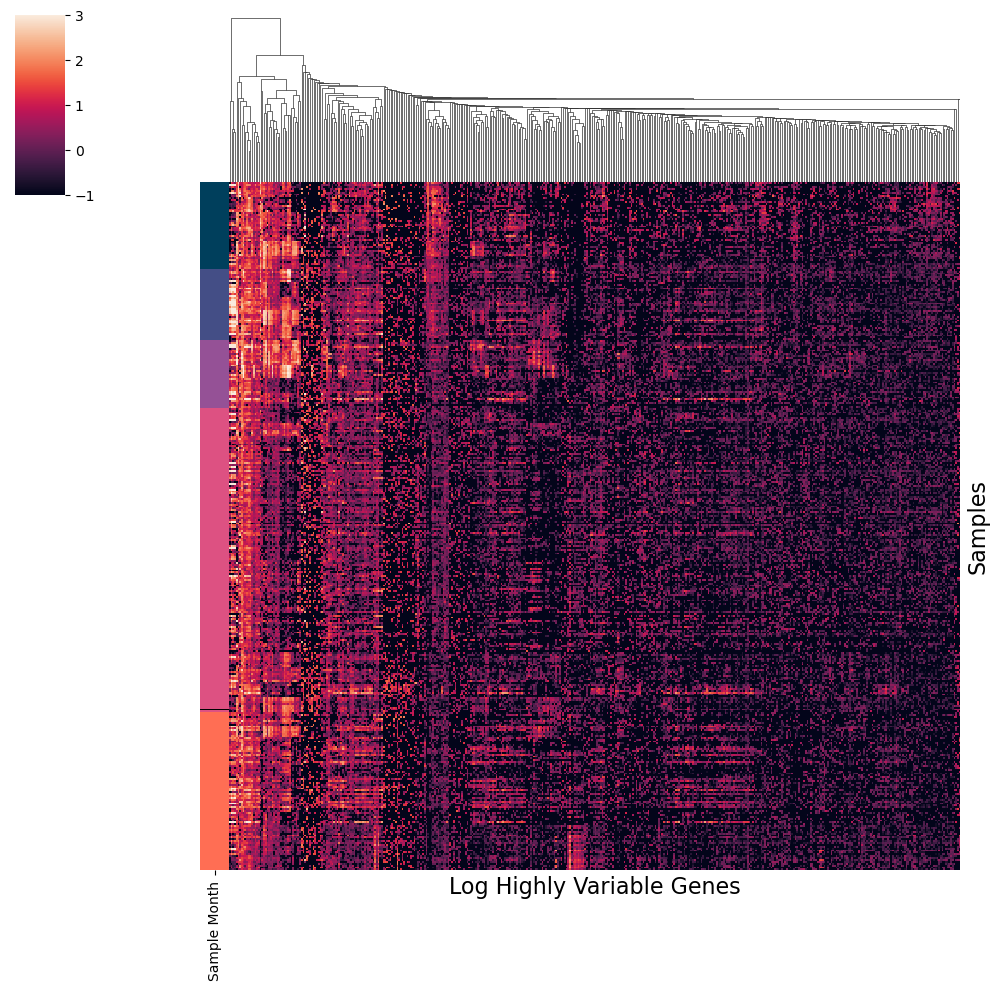

In [29]:
ax = sns.clustermap(
    log_normalized_transcriptome.reindex(
        index=trimmed_metadata.sort_values(by="daysincestart").index
    ),
    vmax=3,
    row_colors=row_colors_cloned,
    row_cluster=False,
    yticklabels=False,
    xticklabels=False,
)
plt.setp(
    ax.ax_heatmap.set_xlabel("Log Highly Variable Genes", fontsize=16),
)
plt.setp(ax.ax_heatmap.set_ylabel("Samples", fontsize=16))
# ax.savefig('/Users/michael/Data/Luke_terrace_experiment/Output_for_Luke/Figs/transcriptome_highly_variable_genes_heatmap.pdf')

In [ ]:
all_by_all_correlation = trimmed_transcriptome.T.corr(method="spearman")

all_by_all_correlation

A2449446903_n01_LICRNA02_A01  \
A2449446903_n01_LICRNA02_A01                      1.000000   
A2449446903_n01_LICRNA02_A02                      0.840287   
A2449446903_n01_LICRNA02_A03                      0.835409   
A2449446903_n01_LICRNA02_A05                      0.837822   
A2449446903_n01_LICRNA02_A06                      0.827200   
...                                                    ...   
B250508004_n01_LICRNA03_H07                       0.844623   
B250508004_n01_LICRNA03_H08                       0.834460   
B250508004_n01_LICRNA03_H09                       0.838119   
B250508004_n01_LICRNA03_H11                       0.831260   
B250508004_n01_LICRNA03_H12                       0.832436   

                              A2449446903_n01_LICRNA02_A02  \
A2449446903_n01_LICRNA02_A01                      0.840287   
A2449446903_n01_LICRNA02_A02                      1.000000   
A2449446903_n01_LICRNA02_A03                      0.917698   
A2449446903_n01_LICRNA02_A05                      0.904837   
A2449446903_n01_LICRNA02_A06                      0.862162   
...                                                    ...   
B250508004_n01_LICRNA03_H07                       0.934046   
B250508004_n01_LICRNA03_H08                       0.926291   
B250508004_n01_LICRNA03_H09                       0.930019   
B250508004_n01_LICRNA03_H11                       0.920081   
B250508004_n01_LICRNA03_H12                       0.926614   

                              A2449446903_n01_LICRNA02_A03  \
A2449446903_n01_LICRNA02_A01                      0.835409   
A2449446903_n01_LICRNA02_A02                      0.917698   
A2449446903_n01_LICRNA02_A03                      1.000000   
A2449446903_n01_LICRNA02_A05                      0.899622   
A2449446903_n01_LICRNA02_A06                      0.851433   
...                                                    ...   
B250508004_n01_LICRNA03_H07                       0.919319   
B250508004_n01_LICRNA03_H08                       0.913392   
B250508004_n01_LICRNA03_H09                       0.917031   
B250508004_n01_LICRNA03_H11                       0.908766   
B250508004_n01_LICRNA03_H12                       0.916416   

                              A2449446903_n01_LICRNA02_A05  \
A2449446903_n01_LICRNA02_A01                      0.837822   
A2449446903_n01_LICRNA02_A02                      0.904837   
A2449446903_n01_LICRNA02_A03                      0.899622   
A2449446903_n01_LICRNA02_A05                      1.000000   
A2449446903_n01_LICRNA02_A06                      0.847208   
...                                                    ...   
B250508004_n01_LICRNA03_H07                       0.914041   
B250508004_n01_LICRNA03_H08                       0.895585   
B250508004_n01_LICRNA03_H09                       0.908653   
B250508004_n01_LICRNA03_H11                       0.895033   
B250508004_n01_LICRNA03_H12                       0.900886   

                              A2449446903_n01_LICRNA02_A06  \
A2449446903_n01_LICRNA02_A01                      0.827200   
A2449446903_n01_LICRNA02_A02                      0.862162   
A2449446903_n01_LICRNA02_A03                      0.851433   
A2449446903_n01_LICRNA02_A05                      0.847208   
A2449446903_n01_LICRNA02_A06                      1.000000   
...                                                    ...   
B250508004_n01_LICRNA03_H07                       0.857477   
B250508004_n01_LICRNA03_H08                       0.852207   
B250508004_n01_LICRNA03_H09                       0.853007   
B250508004_n01_LICRNA03_H11                       0.841965   
B250508004_n01_LICRNA03_H12                       0.848383   

                              A2449446903_n01_LICRNA02_A07  \
A2449446903_n01_LICRNA02_A01                      0.837830   
A2449446903_n01_LICRNA02_A02                      0.909133   
A2449446903_n01_LICRNA02_A03                      0.895139   
A2449446903_n01_LICRNA02_A05                      0.89238

In [39]:
fig, ax = plt.subplots(figsize=(28, 20), dpi=1200)
fig.patch.set_facecolor("white")
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
ax = sns.heatmap(all_by_all_correlation, cmap="viridis")
# plt.xlabel("PCA 1 Transcriptome", fontsize=20)
# plt.ylabel("PCA 1 Bacterial Data", fontsize=20)
# sns.despine()
# ax.grid(False)
# plt.axhline(1, color = 'red', linestyle = 'dashed')
# ax.spines["bottom"].set_color("black")
# ax.spines["bottom"].set_linewidth(2)
# ax.spines["left"].set_color("black")
# ax.spines["left"].set_linewidth(2)
# ax.tick_params(axis="both", width=2)
# plt.xlim((0,3))
# plt.ylim((0, 3))
# handles, labels  =  ax.get_legend_handles_labels()
ax.legend(loc="upper right")
# plt.title("Current Threshold is 31", fontsize = 20)
plt.xticks(fontsize=0, rotation=90)
plt.yticks(fontsize=0)
# ax.plot([0,1],[0,1], transform=ax.transAxes, linestyle = 'dashed', color = 'k', linewidth = 1.5)
# for line in range(0,full_meta_data.shape[0]):
#      ax.text(pca[:,0][line]+0.01, pca[:,1][line],
#      full_meta_data['plate.pos'][line], horizontalalignment='left',
#      size='medium', color='black', weight='semibold')

# plt.ylim(0,10)

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_11195/2511135526.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="upper right")


(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,  17.5,
         18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,  26.5,
         27.5,  28.5,  29.5,  30.5,  31.5,  32.5,  33.5,  34.5,  35.5,
         36.5,  37.5,  38.5,  39.5,  40.5,  41.5,  42.5,  43.5,  44.5,
         45.5,  46.5,  47.5,  48.5,  49.5,  50.5,  51.5,  52.5,  53.5,
         54.5,  55.5,  56.5,  57.5,  58.5,  59.5,  60.5,  61.5,  62.5,
         63.5,  64.5,  65.5,  66.5,  67.5,  68.5,  69.5,  70.5,  71.5,
         72.5,  73.5,  74.5,  75.5,  76.5,  77.5,  78.5,  79.5,  80.5,
         81.5,  82.5,  83.5,  84.5,  85.5,  86.5,  87.5,  88.5,  89.5,
         90.5,  91.5,  92.5,  93.5,  94.5,  95.5,  96.5,  97.5,  98.5,
         99.5, 100.5, 101.5, 102.5, 103.5, 104.5, 105.5, 106.5, 107.5,
        108.5, 109.5, 110.5, 111.5, 112.5, 113.5, 114.5, 115.5, 116.5,
        117.5, 118.5, 119.5, 120.5, 121.5, 122.5, 123.5, 124.5, 125.5,
      